In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MultiLabelBinarizer

In [25]:
bgg_df = pd.read_json('bgg_data.json').T
bgg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3725 entries, 302809 to 274442
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   3725 non-null   object
 1   rating_average         3725 non-null   object
 2   year                   3725 non-null   object
 3   artists                3725 non-null   object
 4   categories             3725 non-null   object
 5   designers              3725 non-null   object
 6   is_expansion           3725 non-null   object
 7   expands                3725 non-null   object
 8   expansion_ids          3725 non-null   object
 9   families               3725 non-null   object
 10  implementations        3725 non-null   object
 11  min_players            3725 non-null   object
 12  max_players            3725 non-null   object
 13  mechanics              3725 non-null   object
 14  min_age                3725 non-null   object
 15  playing_time  

In [239]:
mm_df = pd.read_json('mm_data.json').T
# mm_df.info()

In [240]:
problem_codes = ['No Code', 'No code', '0', None]
print('pre: ', len(mm_df))
mm_df = mm_df[~mm_df['bggeek'].isin(problem_codes)]
mm_df = mm_df[~mm_df['bggeek'].str.contains('[A-Za-z]')]
print('post: ', len(mm_df))

pre:  5855
post:  4826


In [241]:
mm_df['bggeek'] = mm_df['bggeek'].astype(int)

In [242]:
#Merge datasets
merged_df = bgg_df.merge(mm_df, left_on=bgg_df.index, right_on='bggeek')
print('Num. records: ', len(merged_df))
merged_df.head()

Num. records:  3790


,name,rating_average,year,artists,categories,designers,is_expansion,expands,expansion_ids,families,...,product_tag,quantity,rating_count,rating_percentage,rating_star,recent_sales,regular_price,sub_genres,weight,score
0,Betrayal at Mystery Mansion,7.23633,2020,[],"[Adventure, Exploration, Miniatures]","[Banana Chan, Noah Cohen, Rob Daviau, Brian Neff]",False,[],[],"[Game: Betrayal (Avalon Hill), Theme: Spooky O...",...,[New Arrival],108,1,100,5,433,34.99,"[Dice Rolling, Grid Movement, Modular Board, R...",2.6744,82.789
1,Century: Golem Edition – Eastern Mountains,7.70797,2019,"[Atha Kanaani, Chris Quilliams]",[Fantasy],[Emerson Matsuuchi],False,[],[],[Game: Century (Plan B Games)],...,[New Arrival],189,0,0,0,257,39.99,"[Modular Board, Pick-up and Deliver, Point to ...",2.805,80.0155
2,Undaunted: North Africa,8.26482,2020,[Roland MacDonald],"[Wargame, World War II]","[Trevor Benjamin, David Thompson (I)]",False,[],[313441],"[Country: Libya, Game: Undaunted Normandy, His...",...,[New Arrival],138,0,0,0,179,40,[Deck/Pool Building],3.025,77.7967
3,Unmatched: Cobble & Fog,8.74445,2020,[Andrew Thompson],"[Book, Card Game, Fantasy, Fighting, Miniature...","[Rob Daviau, Justin D. Jacobson, Chris Leder]",False,[],[],"[Books: Dracula, Books: Sherlock Holmes, Game:...",...,[New Arrival],78,0,0,0,313,39.95,"[Area Movement, Hand Management, Variable Play...",2.5231,73.9138
4,Fallout Shelter: The Board Game,7.40626,2020,[],[Video Game Theme],[Andrew Fischer],False,[],[],"[Game: Fallout, Theme: Post-Apocalyptic]",...,[New Arrival],120,0,0,0,134,39.95,[Worker Placement],1.3475,72.8044


In [260]:
def combine_column_contents(df:pd.DataFrame(), col_1:str, col_2:str, new_column_name:str):
    temp_column_name = '_'.join((col_1, col_2))
    df[temp_column_name] = df[col_1] + df[col_2] #combine columns
    df[temp_column_name] = df[temp_column_name].apply(lambda x: list(set(x))) #remove duplicates
    
    #Drop categories & genre columns
    df.drop(columns=[col_1, col_2], inplace=True)    
    
    #Rename column
    df.rename(columns={temp_column_name: new_column_name}, inplace=True)
    
    return df

In [244]:
#Combine values from 'genre' and 'categories' columns
merged_df = combine_column_contents(merged_df, 'genre', 'categories', new_column_name='genres')

In [245]:
#Combine values from 'mechanics' and 'sub_genres' columns
merged_df = combine_column_contents(merged_df, 'mechanics', 'sub_genres', new_column_name='mechanics')

In [276]:
#Drop duplicates
merged_df = merged_df.drop_duplicates(subset='bggeek')
merged_df = merged_df.drop_duplicates(subset='title')
merged_df = merged_df.drop(columns=['name'])

In [425]:
#Remove expansions
remove_expansions = True
if remove_expansions == True:
    merged_df = merged_df[merged_df['is_expansion']==False]

In [426]:
game_values = merged_df[['title', 'normal_price', 'mm_price', 'regular_price', 'rating_average', 'rating_bayes_average', 'rating_stddev']]
game_values.head()

,title,normal_price,mm_price,regular_price,rating_average,rating_bayes_average,rating_stddev
0,Scooby Doo: Betrayal at Mystery Mansion (New A...,26.99,26.99,34.99,7.23633,5.56953,1.64706
1,Century: Golem Edition - Eastern Mountains (Ne...,27.99,27.99,39.99,7.70797,5.82307,1.00562
2,Undaunted: North Africa (New Arrival),28.99,28.99,40,8.26482,5.88642,1.24028
3,Unmatched: Cobble & Fog (New Arrival),30.99,30.99,39.95,8.74445,5.94348,1.06607
4,Fallout Shelter: The Board Game (New Arrival),31.99,31.99,39.95,7.40626,5.80115,1.17744


In [427]:
game_values[game_values['normal_price']!=game_values['mm_price']]

,title,normal_price,mm_price,regular_price,rating_average,rating_bayes_average,rating_stddev
3217,Nusfjord,28,42,70,7.59257,6.94974,1.18054


In [428]:
#Drop games with score of '0'
game_values = game_values[game_values['rating_average']!=0.00000]
#Set types
game_values['rating_average'] = game_values['rating_average'].astype(float)
game_values['mm_price'] = game_values['mm_price'].astype(float)

In [429]:
#Remove games with value lower than $5
game_values = game_values[game_values['mm_price']>5.00]

#Value prediction
game_values['pred_value'] = game_values['rating_average']/game_values['mm_price']
game_values.head()

,title,normal_price,mm_price,regular_price,rating_average,rating_bayes_average,rating_stddev,pred_value
0,Scooby Doo: Betrayal at Mystery Mansion (New A...,26.99,26.99,34.99,7.23633,5.56953,1.64706,0.268112
1,Century: Golem Edition - Eastern Mountains (Ne...,27.99,27.99,39.99,7.70797,5.82307,1.00562,0.275383
2,Undaunted: North Africa (New Arrival),28.99,28.99,40,8.26482,5.88642,1.24028,0.285092
3,Unmatched: Cobble & Fog (New Arrival),30.99,30.99,39.95,8.74445,5.94348,1.06607,0.282170
4,Fallout Shelter: The Board Game (New Arrival),31.99,31.99,39.95,7.40626,5.80115,1.17744,0.231518


In [430]:
testing = game_values.sort_values(by=['pred_value'], ascending=False)#[~game_values['title'].str.contains('expansion|LCG|Dice|dice|Expansion|Preorder|Pack')]

(array([566., 736., 396., 242., 104.,  38.,  17.,   5.,   2.,   1.]),
 array([0.0453398 , 0.17506442, 0.30478903, 0.43451365, 0.56423827,
        0.69396289, 0.82368751, 0.95341212, 1.08313674, 1.21286136,
        1.34258598]),
 <a list of 10 Patch objects>)

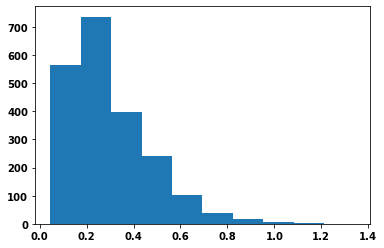

In [431]:
import matplotlib.pyplot as plt
plt.hist(testing['pred_value'])

In [432]:
testing[testing['pred_value']>1.0]

,title,normal_price,mm_price,regular_price,rating_average,rating_bayes_average,rating_stddev,pred_value
102,Freedom! Solo Mode Expansion (New Arrival),5.99,5.99,8,8.04209,5.62994,1.08064,1.342586
2631,Braintopia Kids (On Sale),7,7.00,14.99,8.20000,0,1.6,1.171429
2656,What the Heck?,5.99,5.99,7.99,6.49709,6.04592,1.27592,1.084656
3250,Sea Change (Preorder),7,7.00,10,7.50000,0,1.71131,1.071429
1700,Dome Crushers (Clearance),6,6.00,9.95,6.38061,5.54492,1.66707,1.063435
1179,Squire for Hire: Mystic Runes (Preorder),6.49,6.49,9,6.85600,0,1.94498,1.056394
3576,Welcome to... Spring Neighborhood Expansion,7.49,7.49,9.95,7.64019,7.41547,1.10806,1.020052


In [440]:
merged_df[merged_df['title']=='Freedom! Solo Mode Expansion (New Arrival)']

,rating_average,year,artists,designers,is_expansion,expands,expansion_ids,families,implementations,min_players_x,...,quantity,rating_count,rating_percentage,rating_star,recent_sales,regular_price,weight,score,genres,mechanics
102,8.04209,2020,[Bartek Jędrzejewski],[Vangelis Bagiartakis],False,[],[296603],"[Country: Greece, Crowdfunding: Kickstarter, P...",[],2,...,0,0,0,0,7,8,0.1205,4.42914,[Wargame],"[Area Majority/Influence, Hand Management, Var..."


In [95]:
#Binarize genres
mlb = MultiLabelBinarizer()
test = pd.DataFrame(mlb.fit_transform(list(mm_df['genre'])), columns='genre_'+mlb.classes_, index=mm_df.index)
test.head()

,genre_,genre_Abstract,genre_Adventure,genre_Age of Reason,genre_Alternate History,genre_American Civil War,genre_American Indian Wars,genre_American Revolutionary War,genre_American West,genre_Ancient,...,genre_Trains,genre_Transportation,genre_Travel,genre_Trivia,genre_Video Game Theme,genre_Vietnam War,genre_Wargame,genre_Word Game,genre_World War I,genre_World War II
WOCC75670,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PBG40050EN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OSPGAM032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
LED01005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
REO9304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
